In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [53]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [54]:
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [56]:
data1=data.rename({"YearsExperience":"Experiance_year","Salary":"salary"},axis=1)
data1

,Experiance_year,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<Axes: ylabel='Density'>

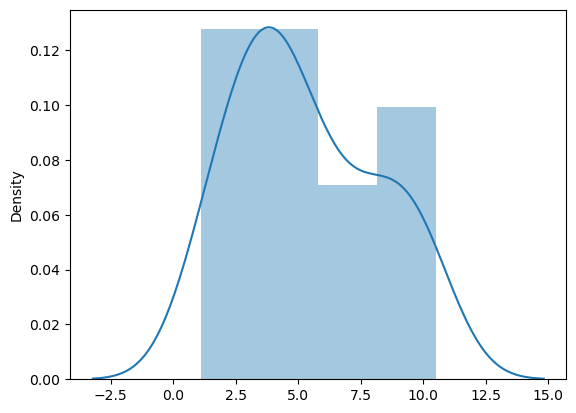

In [57]:
sns.distplot(x=data1["Experiance_year"])

<Axes: xlabel='salary', ylabel='Density'>

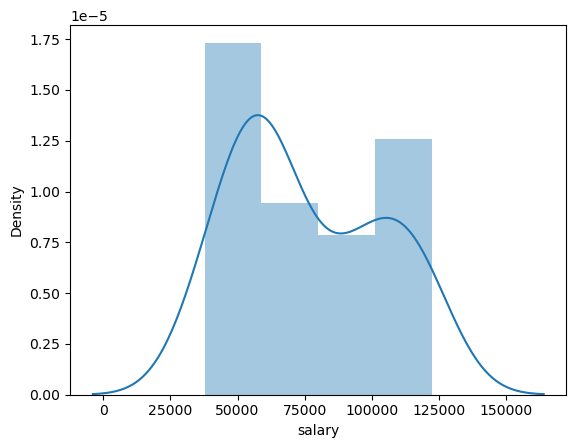

In [58]:
sns.distplot(data1["salary"])

In [59]:
#Correlation Analysis
data1.corr()

,Experiance_year,salary
Experiance_year,1.000000,0.978242
salary,0.978242,1.000000


<Axes: xlabel='Experiance_year', ylabel='salary'>

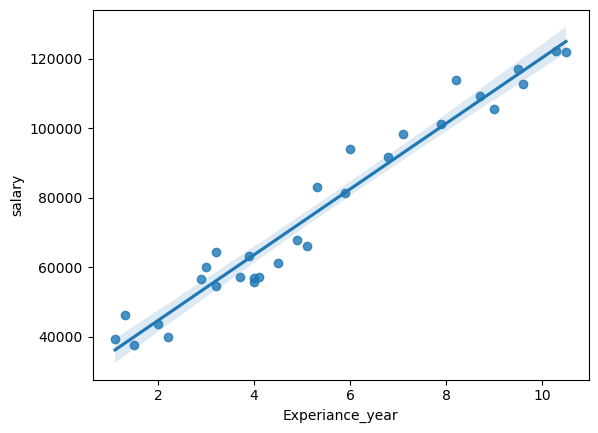

In [60]:
sns.regplot(x=data1["Experiance_year"],y=data1["salary"])

In [61]:
model=smf.ols("salary~Experiance_year",data=data1).fit()


In [62]:
# finding coefficient parameters
model.params

Intercept          25792.200199
Experiance_year     9449.962321
dtype: float64

In [63]:
# finding the p-values and t-values
model.pvalues

Intercept          5.511950e-12
Experiance_year    1.143068e-20
dtype: float64

In [64]:
model.tvalues

Intercept          11.346940
Experiance_year    24.950094
dtype: float64

In [65]:
# finding Rsquare values
model.rsquared

0.9569566641435086

In [66]:
# prediction for 3 $ 5 yrs of experiance
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [68]:
data_pred=pd.DataFrame(new_data,columns=["Experiance_year"])
data_pred

,Experiance_year
0,3
1,5


In [69]:
# final pred values
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64